# Python Fundamentals
## Loading Data
Merge “articleInfo.csv” and “authorInfo.csv” into one data frame based on “Article No.”, fill all empty cells with the value of 0

In [1]:
import pandas as pd

articleInfo_df = pd.read_csv('articleInfo.csv')
authorInfo_df = pd.read_csv('authorInfo.csv')
publicationInfo = articleInfo_df.merge(authorInfo_df, on='Article No.').fillna(value=0)
publicationInfo.head(5)

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


## Plotting Data
1. Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.
3. Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.
4. Plot the figure of the number of publications across countries. You may use any available python libraries, such as pygal_maps_world, geopandas, or others.
5. What are the top 5 institutions that have the most published articles in this area?
6. Who are the top 5 researchers that have the most h-index in this area?

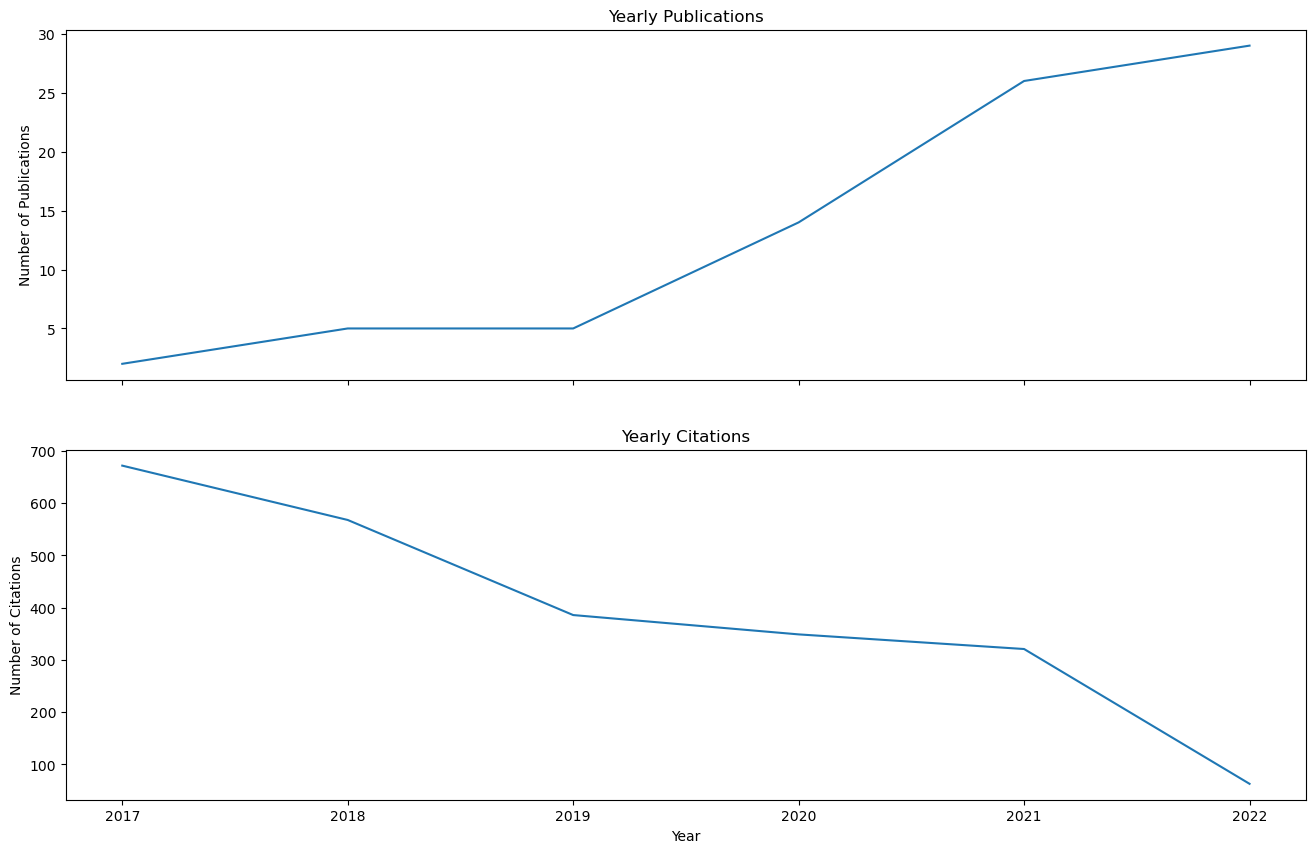

In [2]:
# Steps 1-3

import matplotlib.pyplot as plt

yearly_publication = publicationInfo[['Year', 'Article No.']].groupby('Year').nunique()
yearly_publication = yearly_publication.rename(columns={'Article No.': 'Num Articles'})

yearly_citation = publicationInfo[['Year', 'Article No.', 'Citation']].drop_duplicates().groupby('Year').sum()
yearly_citation = yearly_citation.rename(columns={'Citation': 'Num Citations'})

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10)) 
ax1.plot(yearly_publication.index, yearly_publication['Num Articles'])
ax2.plot(yearly_citation.index, yearly_citation['Num Citations'])

ax1.set_title('Yearly Publications')
ax1.set_ylabel('Number of Publications')
ax2.set_title('Yearly Citations')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Citations')
plt.show()


In [3]:
# Step 4

import country_converter as coco
import pygal

countries = publicationInfo.loc[publicationInfo['Country'] != 0].copy() # filter out NaN/0 values
countries['Country'] = countries['Country'].str.strip() # strip whitespace from countries

countries_groupby = countries.groupby('Country', as_index=False) # group publications by country
countries_pubs = countries_groupby.nunique()[['Country', 'Article No.']] # get count of unique publications per group
countries_pubs = countries_pubs.rename(columns={'Article No.': 'Pub Count'}) # rename columns to be accurate

countries_pubs['Country Code'] = coco.convert(names=countries_pubs['Country'], to='ISO2', not_found='None') # get country codes ==> raises warning
countries_pubs['Country Code'] = countries_pubs['Country Code'].str.lower() # put country codes in lowercase for pygal
countries_pubs = countries_pubs.loc[countries_pubs['Country Code'] != 'none'] # remove non-countries

pygal_input = pd.Series(countries_pubs['Pub Count'].values,index=countries_pubs['Country Code']).to_dict() # convert data to dictionary for pygal

worldmap_chart = pygal.maps.world.World() # initialize map
worldmap_chart.title = 'Number of Publications by Country'
worldmap_chart.add('Pub Count', pygal_input) # add data to pygal worldmap
worldmap_chart.render_in_browser() # open a new browser tab to render interactive map


Bristol not found in regex
Chian not found in regex
Denamrk not found in regex


file:///var/folders/t6/vrpm60391v341xll_t7l75040000gn/T/tmptqb16f3t.html


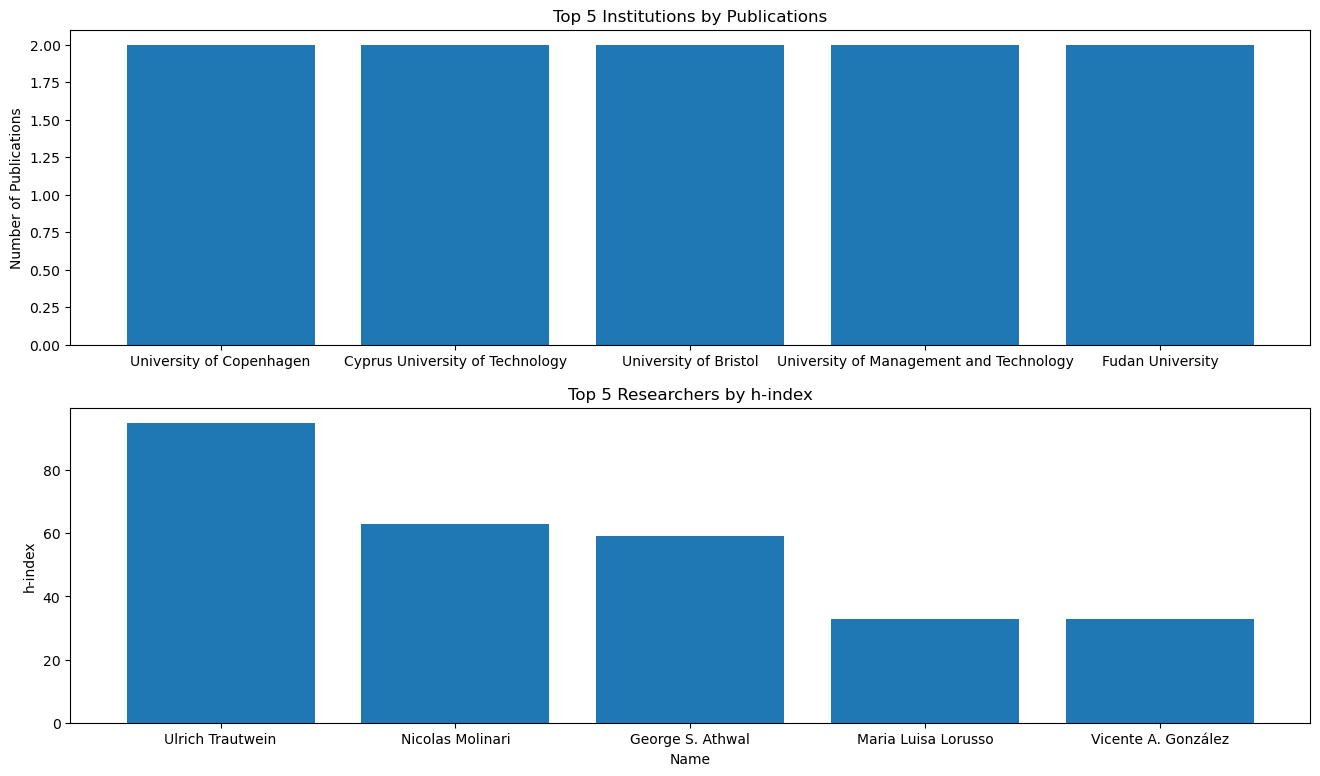

In [4]:
# Step 4-5

articles_per_institution = publicationInfo[['Article No.', 'Author Affiliation']].copy() # copy view of article numbers and affiliations
articles_per_institution['Author Affiliation'] = articles_per_institution['Author Affiliation'].str.strip() # remove whitespace from affiliation
articles_per_institution = articles_per_institution.groupby('Author Affiliation').nunique() # groupby affiliation and get count of unique 
articles_per_institution = articles_per_institution.rename(columns={'Article No.' : 'Pub Count'})
articles_per_institution = articles_per_institution.sort_values('Pub Count', ascending=False)
top_five_institutions = articles_per_institution.head(5) # get the top five after sorting descending

top_five_researchers = publicationInfo[['Author Name', 'h-index']].sort_values('h-index', ascending=False).head(5) # isolate names and indexes then sort and grab top 5

fig, (ax1, ax2) = plt.subplots(2 ,1, figsize=(16, 9)) # create the subplots

ax1.bar(top_five_institutions.index, top_five_institutions['Pub Count'])
ax2.bar(top_five_researchers['Author Name'], top_five_researchers['h-index'])

ax1.set_title('Top 5 Institutions by Publications')
ax2.set_xlabel('Institutions')
ax1.set_ylabel('Number of Publications')
ax2.set_title('Top 5 Researchers by h-index')
ax2.set_xlabel('Name')
ax2.set_ylabel('h-index')
plt.show()

# Regression
## Description of data in siriTicketPurchases.csv
- **Purchase:** Whether the customer purchased a ticket or not by using Siri. (1: Yes, 0: No)
- **SUS:** System Usability Survey scores, which the users filled out after interacting with Siri. (See this [link](https://www.usability.gov/how-to-and-tools/methods/system-usability-scale.html) for more info)
- **ASR_Error:** Number of times Siri fails to recognize the user’s speech.
- **Intent_Error:** Number of times the system failed to classify the user’s intention/speech act.
- **Duration:** Total duration (seconds) of the dialogue between Siri and the user.
- **Gender:** Gender of the user (0: Female, 1: Male)

### Tasks
Train a Regression model in which: the independent variables (inputs) are “ASR_Error,” “IntentError,” “Duration,” “Gender,” and “Purchase”; the dependent variable (output) is “SUS., and anwer the following questions:
1. Show the statistical results of your trained regression model.
2. What features are significant? What features are insignificant?
3. Were the results what you expected? Explain why or why not, for each feature.
4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.
5. What are the potential reasons for these factor(s) being significant predictors of SUS?

In [36]:
# bring in and clean data
ticketPurchases = pd.read_csv('siriTicketPurchases.csv').drop('Unnamed: 6', axis=1)
ticketPurchases.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


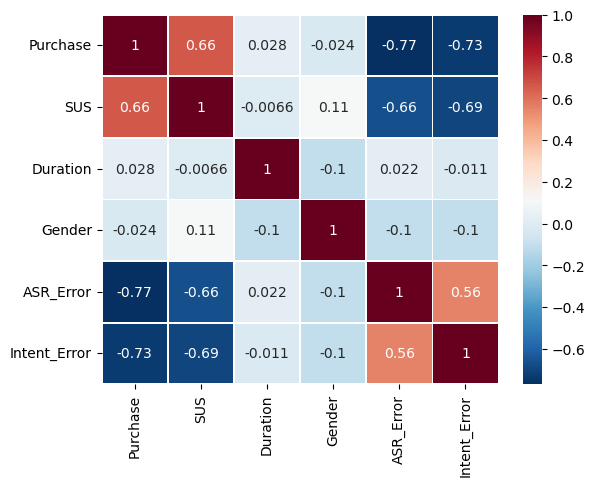

In [37]:
# analyze data
import seaborn as sb

# heatmap of correlation
pearsoncorr = ticketPurchases.corr(method='pearson')
pearsoncorr = sb.heatmap(pearsoncorr, 
                         xticklabels=pearsoncorr.columns,
                         yticklabels=pearsoncorr.columns,
                         cmap='RdBu_r',
                         annot=True,
                         linewidth=0.5)


In [74]:
# creating the model with sklearn  using a training and testing data split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

x = ticketPurchases[['Purchase', 'Duration', 'Gender', 'ASR_Error', 'Intent_Error']]
y = ticketPurchases['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=11)

model = LinearRegression().fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("The R square score of linear regression model is: ", model.score(x_test,y_test))

The R square score of linear regression model is:  0.435135950708439


In [40]:
# creating the model with statsmodels to get a more comprehensive overview
import statsmodels.api as sm

#add constant to predictor variables
x_const = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_const).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        23:43:03   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

## Regression Results
1. Show the statistical results of your trained regression model.
    - R^2 has a value of .593 and my adjusted R^2 is .571
    - My p value is 5.25e-17 which means at least one independent variable is related to the dependent variable and that my regression model is of good fit
2. What features are significant? What features are insignificant?
    - The only independent variables that are shown to significantly affect the dependent variable are the ASR_error and Intent_Error
    - Purchase, Duration, and Gender are shown to be insignificant
3. Were the results what you expected? Explain why or why not, for each feature.
    - **Purchase:** I would've expected this feature to predict the SUS score more significantly
    - **Duration:** I would imagine the SUS score to be closely related to the duration the user used Siri for and have a directly proportional relationship but it seems the feature was not statistically significant
    - **Gender:** I didn't expect Gender to be a significant predictor of the SUS score
    - **ASR_Error:** I expected ASR_Error to be a significant predictor of the SUS score because if Siri is unable to recognize the user's voice then it impacts the usability
    - **Intent_Error:** I expected this feature to be significant as well because if Siri couldn't determine the user's intent it's unusable
4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.
    - The model suggests that Intent_Error is the most influential factor on SUS
    - The column P > |t| shows that Intent_Error significantly impacts SUS with a score of ~0 while ASR_Error only has a score of 0.001
5. What are the potential reasons for these factor(s) being significant predictors of SUS?
    - These factors are likely significant predictors of SUS because they directly correlate to how well Siri performed

# Classification
**Classification (40 points)**

For this question, use the same dataset in the above
question. Train a Classification model in which: the independent variables
(inputs) are “ASR_Error,” “IntentError,” “Duration,” and “Gender,”; the dependent
variable (output) is “Purchase.” 

Use the evaluation metrics we introduced in class to compare the performance of the following four machine learning classification algorithms:
1. Logistic Regression
2. SVM
3. Naive Bayes
4. Random Forest

In [41]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

No Purchase    51
Purchase       49
Name: Purchase, dtype: int64


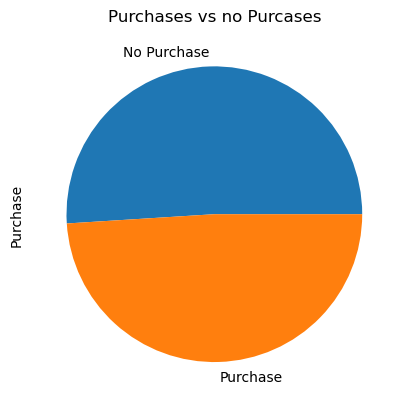

In [55]:
# analyze data

purchases = ticketPurchases['Purchase']
purchases = purchases.replace(0, 'No Purchase').replace(1, 'Purchase')
purchases = purchases.value_counts()
print(purchases)
purchases.plot(kind='pie', title='Purchases vs no Purcases')
plt.show()

In [11]:
# prepare data

X = ticketPurchases[['ASR_Error', 'Intent_Error', 'Duration', 'Gender']]
y = ticketPurchases['Purchase']

scale = StandardScaler()
scaled_X = scale.fit_transform(X) # scale data

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3) # creating split for training and testing data

# don't need to oversampel because data is distributed evenly
# oversample = SMOTE()
# over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train) # resample data using SMOTE

In [12]:
# create train models

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()
4
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# test models

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

SVM Classification Report
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90   

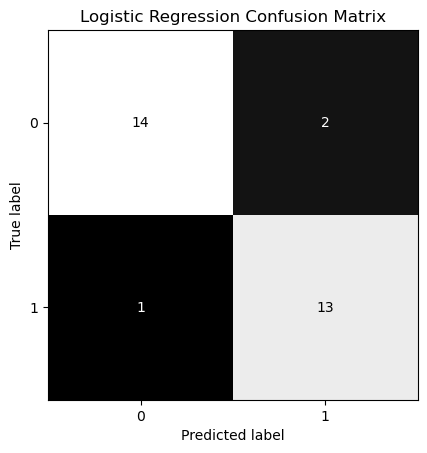

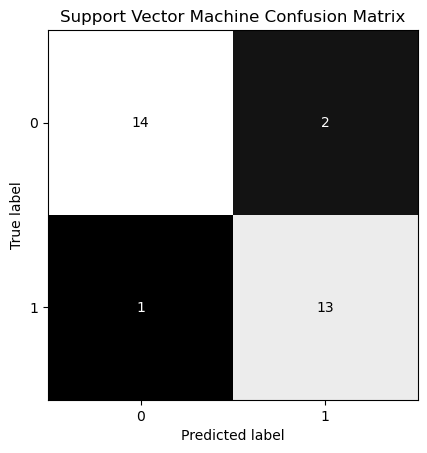

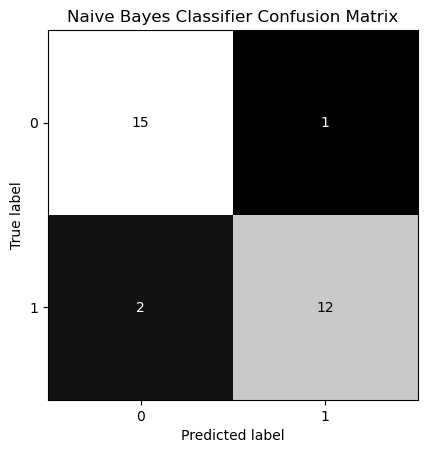

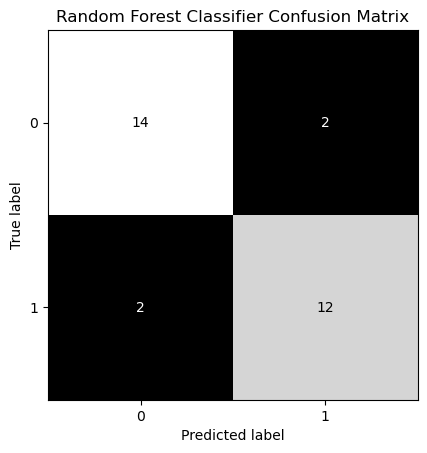

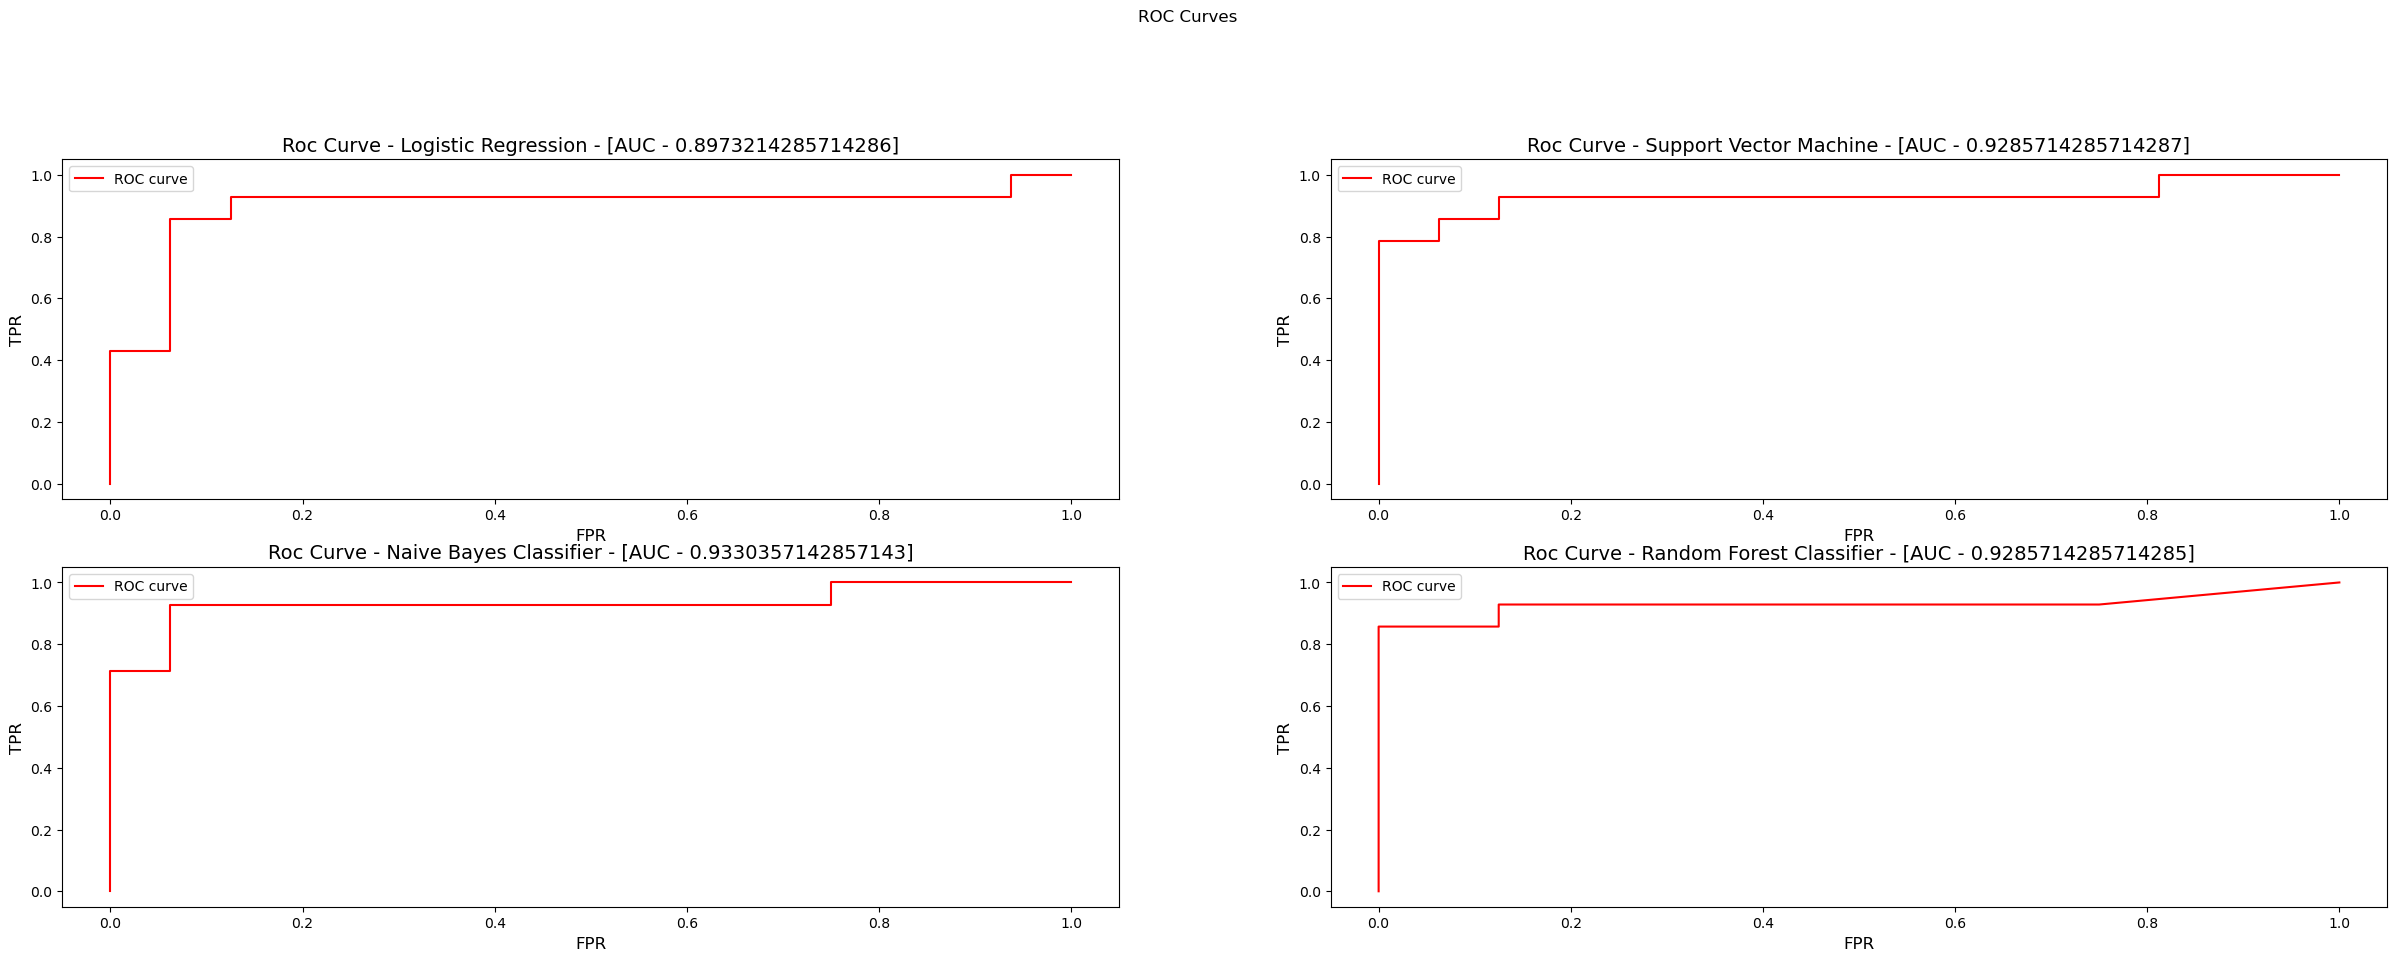

In [15]:
# evaluate models
print('Logistic Regression Classification Report')
print(classification_report(y_test, y_lc_predicted))
print('SVM Classification Report')
print(classification_report(y_test, y_svc_predicted))
print('Naive Bayes Classification Report')
print(classification_report(y_test, y_nbc_predicted))
print('Random Forest Classification Report')
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

## Comparing Model Performance
Looking at the AUC for each ROC curve, the Naive Bayes Classifer has the highest AUC. For this dataset I'm assuming we care about true negatives as much as we do true positives and so this metric is the best for comparing the models. This means the Naive Bayes Classifier performs the best.